<center>

# `Dry Bean Classifier - Multiclass Logistic Regression`

<img src="../assets/img.png" alt="Texto alternativo" width="1000">

</center>

# `What version of scikit-learn do we have?`

In [38]:
import sklearn
print(sklearn.__version__)

1.4.1.post1


# `Import libraries`

In [70]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# `Load data`

In [71]:
df = pd.read_csv('../data/dry_bean_data.csv')
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [41]:
# valores unicos a clasificar
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [43]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


# `Drop duplicates values`

In [44]:
df.drop_duplicates(inplace=True)

# `There aren't null values`

In [45]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

# `How many instances do we have of each bean class?`

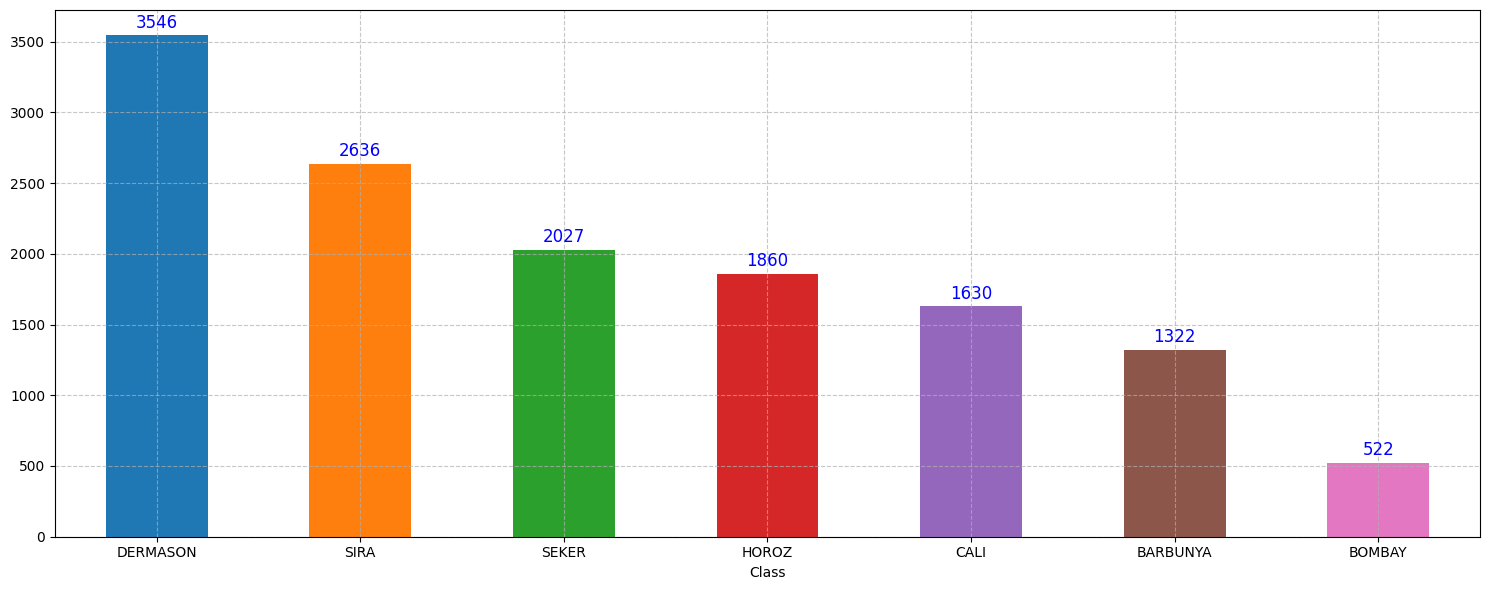

In [46]:
plt.figure(figsize=(15,6))
colors = plt.cm.tab10.colors
ax = df.Class.value_counts().plot(kind='bar', color=colors)

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='blue')

plt.xticks(rotation=0)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# `Undersampling`

In [47]:
# libreria para realizar undersampling, revizar sobre la libreria
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

X = df.drop('Class',axis=1)
y = df.Class

X_over , y_over = undersample.fit_resample(X,y)

# `Dataset balanced`

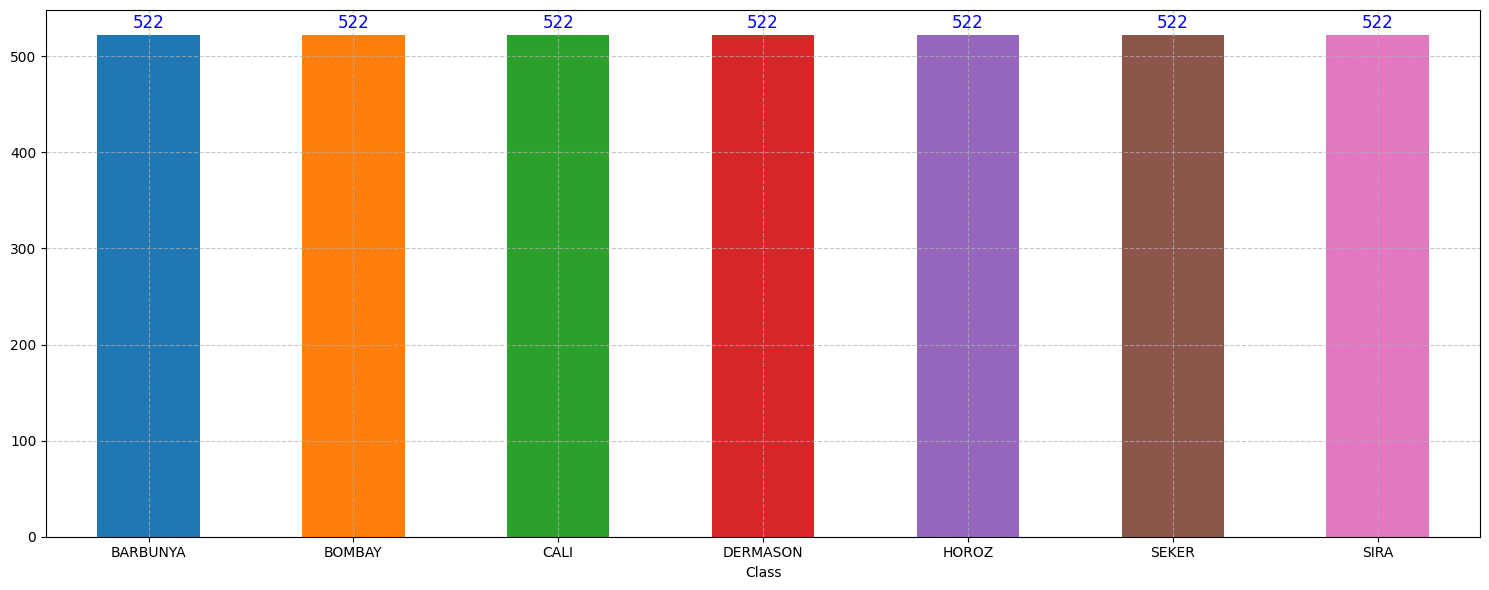

In [48]:
plt.figure(figsize=(15,6))
colors = plt.cm.tab10.colors
ax = y_over.value_counts().plot(kind='bar', color=colors)

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points', fontsize=12, color='blue')

plt.xticks(rotation=0)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# `Convert target variable to numeric`

In [49]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y_over = label_encoder.fit_transform(y_over)

In [51]:
list(np.unique(y_over))

[0, 1, 2, 3, 4, 5, 6]

# `EDA - correlations between numericals features`

In [52]:
df_dea = X_over
df_dea['Class'] = y_over

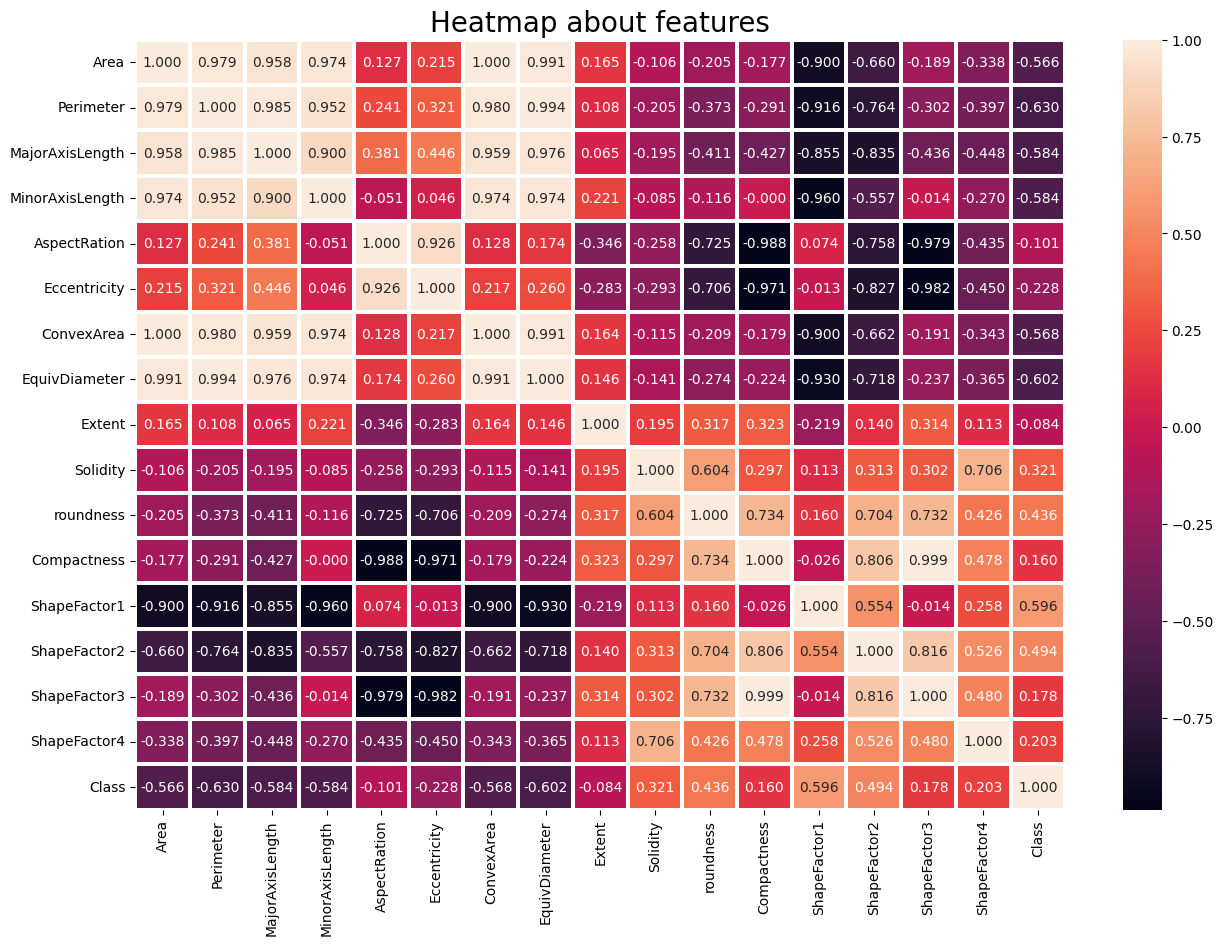

In [53]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), annot=True, fmt=".3f", linewidths=1.5)
plt.title("Heatmap about features", fontsize=20)
plt.show()

# `Drop highly correlated features`

In [54]:
X_over.drop(['ConvexArea','EquivDiameter'], axis=1, inplace=True)

# `Data Viz`

In [55]:
#sns.pairplot(df_dea, hue='Class')

# `Data splitting and Data scaling`

In [56]:
# Data splitting
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)

# Data scaling
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

In [57]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

# `Which model?`

In [72]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None    

/home/carlos/dev/public/dry_bean_classifier/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1216: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


# `Show results`

In [73]:
scores

[0.9835841313269493,
 0.9863201094391245,
 0.9863201094391245,
 0.9863201094391245,
 0.9863201094391245,
 0.9945280437756497,
 0.9945280437756497,
 0.9945280437756497,
 0.9931600547195623]

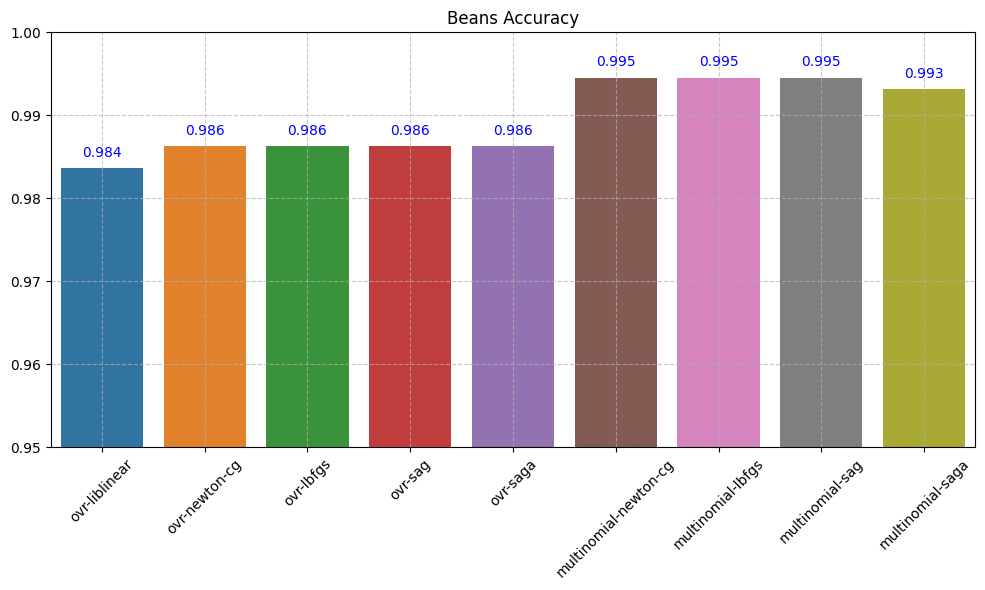

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=params, y=scores, hue=params)
ax.set_title('Beans Accuracy')

plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.ylim(0.95, 1.0)

for index, value in enumerate(scores):
    ax.text(index, value + 0.001, str(round(value, 3)), ha='center', va='bottom', color='blue')

plt.tight_layout()
plt.show()

# `Best model`

In [61]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


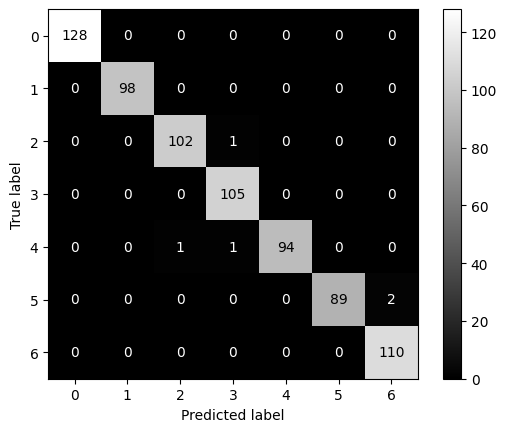

In [77]:
# plt.figure(figsize=(15,15)) 
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) 
disp.plot(cmap='gray') 
plt.show()